## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 이름과 다르게 **분류(Classification)** 알고리즘이다.
- 로지스틱 회귀는 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### 로지스틱회귀 맛보기

In [3]:
X = iris.data
y = iris.target

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
model.score(X, y)

0.96

In [7]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.96

### 속성을 2개로 제한

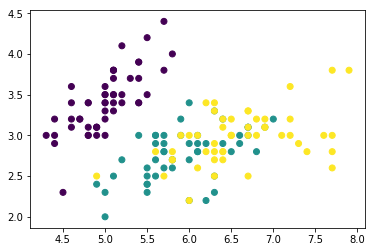

In [10]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

In [11]:
X = iris.data[:,:2]
y = iris.target

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
model.score(X, y)

0.7666666666666667

In [14]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.7666666666666667

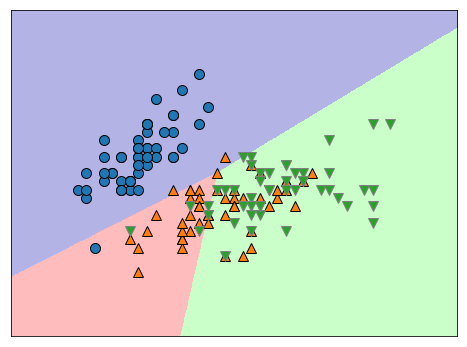

In [15]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 속성을 2개로 클래스도 2개로 제한

In [16]:
### sepal length/pepal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [18]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

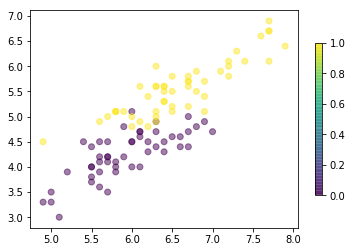

In [21]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar(shrink=0.7)

In [22]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model.score(X, y)

0.91

In [24]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.91

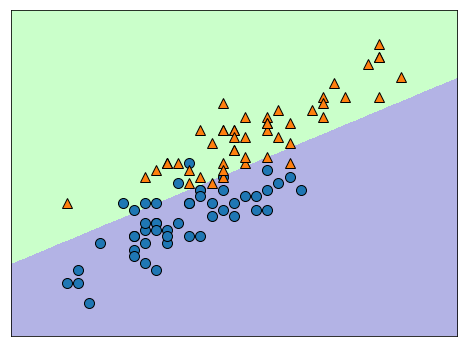

In [25]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [26]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

### 옵션 C
- C 값이 클수록 칼 같이 자른다
- C 값이 작을수록 대강 자른다

In [43]:
model = LogisticRegression(C=0.1)
model.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
model.score(X, y)

0.9

In [45]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.9

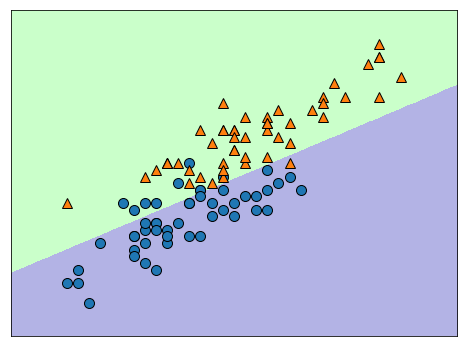

In [46]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 로지스틱회귀의 원리 (신경망 관점)
- 선형회귀의 결과를 시그모이드(로지스틱)함수에 적용한다
- 시그모이드함수는 계단함수의 역할이다
- 최종 결과는 0~1 사이의 값을 가진다 (대부분은 0이나 1이 된다)

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png">

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/sigmoid.png">

<br>(출처: https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)

In [56]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [65]:
W = np.array([2,-1]) # w1, w2
b = 0

pred_y = sigmoid(X@W + b) # 예측값
pred_y

array([0.99990858, 0.99975154, 0.99986363, 0.99908895, 0.99977518,
       0.99899323, 0.99962939, 0.99849882, 0.99981593, 0.99849882,
       0.99849882, 0.9994998 , 0.99966465, 0.99944722, 0.9994998 ,
       0.99987661, 0.9987706 , 0.99944722, 0.99962939, 0.99932492,
       0.99908895, 0.99972542, 0.99954738, 0.99944722, 0.99979657,
       0.99984929, 0.99984929, 0.99977518, 0.99944722, 0.99962939,
       0.99925397, 0.99932492, 0.99954738, 0.99899323, 0.99816706,
       0.99944722, 0.99983344, 0.99972542, 0.99917558, 0.99908895,
       0.99864148, 0.9994998 , 0.9994998 , 0.9987706 , 0.99908895,
       0.99925397, 0.99925397, 0.99969655, 0.99925397, 0.99932492,
       0.99864148, 0.99849882, 0.99975154, 0.99908895, 0.99925397,
       0.99981593, 0.9950332 , 0.99975154, 0.9994998 , 0.99975154,
       0.99962939, 0.99944722, 0.99969655, 0.9983412 , 0.99849882,
       0.99944722, 0.99944722, 0.99983344, 0.99979657, 0.99908895,
       0.99969655, 0.99816706, 0.99983344, 0.99954738, 0.99954

In [66]:
X@W+b

array([9.3, 8.3, 8.9, 7. , 8.4, 6.9, 7.9, 6.5, 8.6, 6.5, 6.5, 7.6, 8. ,
       7.5, 7.6, 9. , 6.7, 7.5, 7.9, 7.3, 7. , 8.2, 7.7, 7.5, 8.5, 8.8,
       8.8, 8.4, 7.5, 7.9, 7.2, 7.3, 7.7, 6.9, 6.3, 7.5, 8.7, 8.2, 7.1,
       7. , 6.6, 7.6, 7.6, 6.7, 7. , 7.2, 7.2, 8.1, 7.2, 7.3, 6.6, 6.5,
       8.3, 7. , 7.2, 8.6, 5.3, 8.3, 7.6, 8.3, 7.9, 7.5, 8.1, 6.4, 6.5,
       7.5, 7.5, 8.7, 8.5, 7. , 8.1, 6.3, 8.7, 7.7, 7.7, 8.4, 7.6, 7.3,
       7.2, 8.6, 8.7, 9.4, 7.2, 7.5, 6.6, 9.3, 7. , 7.3, 7.2, 8.4, 7.8,
       8.7, 6.5, 7.7, 7.7, 8.2, 7.6, 7.8, 7. , 6.7])

In [67]:
cost = ((pred_y - y)**2).mean() # MSE로 비용계산
cost

0.4993704231883327

In [72]:
W = np.array([1.9,-1]) # w1, w2
b = 0

pred_y = sigmoid(X@W + b)
cost = ((pred_y - y)**2).mean() # MSE
cost

0.4988927688176688

In [74]:
w1=0
w2=0
b=0

pred_y = w1*X[:,0] + w2*X[:,1] + b

In [75]:
pred_y = sigmoid(pred_y)

In [76]:
cost = ((pred_y - y)**2).mean() # MSE
cost

0.25

### 시그모이드함수 분석

In [77]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

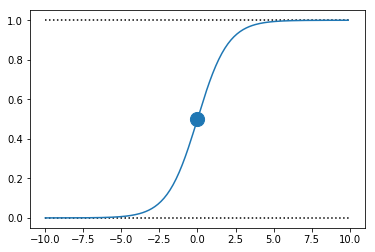

In [82]:
x = np.arange(-10,10,0.1)
plt.hlines([0,1], -10,10, linestyles=':')
plt.plot(x, sigmoid(x))
plt.scatter([0],[0.5], s=200)

- 최종출력값이 0.3 이라면, 0.5를 기준으로 해서 레이블-0 으로 판별한다
- 최종출력값이 0.3 이라면, 레이블-1 이 될 확률이 0.3, 레이블-0이 될 확률이 0.7로 해석할 수 있다
- 결과적으로 시그모이드함수의 출력값을 **확률**로 해석할 수 있다

### 가중치 분석

In [16]:
### sepal length/pepal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [18]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
model.coef_, model.intercept_

(array([[-0.64133541,  0.90925646]]), array([-0.31319012]))

In [84]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

w1, w2, b

(-0.6413354060178963, 0.9092564588403724, -0.3131901206112607)

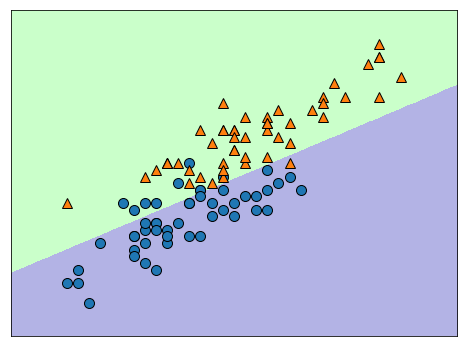

In [86]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

<img src="https://plot.ly/~florianh/149.png">
<br>(출처: https://florianhartl.com/logistic-regression-geometric-intuition.html)

<img src="https://dpzbhybb2pdcj.cloudfront.net/orland/v-11/Figures/15image015.png">
<br>(출처: https://livebook.manning.com/book/math-for-programmers/chapter-15/v-11/131)

- 평면방정식
> z = ax + by + c

### 크로스 엔트로피
- 로지스틱 회귀의 비용함수로 사용함

#### 클래스가 2개인 경우
- cross_entropy = (-y * np.log(pred_y) - (1-y) * np.log(1-pred_y)).sum()

#### 클래스가 3개 이상인 경우
- cross_entropy = (-y * np.log(pred_y)).sum()
- 여기서 pred_y  는 소프트맥스 함수를 적용한 결과임
- 그리고, y 는 [1,0,0], [0,1,0], [0,0,1] 과 같이 원핫인코딩이어야 함